## Topics
1. Reviewing the iris dataset
2. K-nearest neighbors (KNN) classification
3. Example of training data
4. KNN classification map (K = 1)
5. KNN classification map (K = 5)
6. Loading the data
7. scikit-learn 4-step modeling pattern
8. Using a different value for K
9. Using a different classification model (logistic regression)
10. Different values explanation
11. Resources

_This tutorial is derived from Data School's Machine Learning with scikit-learn tutorial. Ritchie Ng added notes so anyone, including myself, can refer to this tutorial without watching the videos._

### 1. Reviewing the iris dataset

- 150 **observations**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **Response** variable is the iris species
- **Classification** problem since response is categorical
- More information in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

### 2. K-nearest neighbors (KNN) classification

In essence, it's to classify your training data into groups that are similar.

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### 3. Example training data

![Training data](images/04_knn_dataset.png)

- Dataset with 2 numerical features (x and y coordinates)
- Each point: observation
- Colour of point: response class (red, blue or green)

### 4. KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

- Background colour: predicted response value for a new observation

### 5. KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

- Decision boundaries have changed in this scenario
- White areas: KNN cannot make a clear decision because there's a tie between 2 classes
- It can make good predictions if the features have very dissimilar values

*Image Credits: [Data3classes](http://commons.wikimedia.org/wiki/File:Data3classes.png#/media/File:Data3classes.png), [Map1NN](http://commons.wikimedia.org/wiki/File:Map1NN.png#/media/File:Map1NN.png), [Map5NN](http://commons.wikimedia.org/wiki/File:Map5NN.png#/media/File:Map5NN.png) by Agor153. Licensed under CC BY-SA 3.0*

### 6. Loading the data

In [1]:
import matplotlib.pyplot as plt

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# discover what data and target are
# print iris.data
# print iris.target

# store feature matrix in "X"
# we use an uppercase for "X" because it is a matrix of m x n dimension
X = iris.data

# store response vector in "y"
# we use a lowercase for "y" because it is a vector or m x 1 dimension
y = iris.target

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

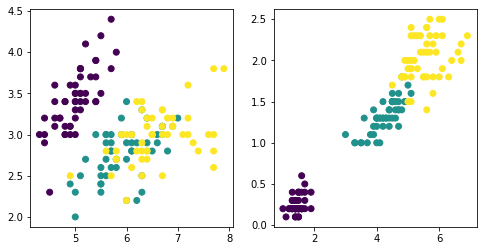

In [6]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1], c=y)

plt.subplot(122)
plt.scatter(X[:,2],X[:,3], c=y)

plt.show()

In [7]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### 7. scikit-learn 4-step modeling pattern

_Scikit-learn uses a common modeling pattern to use its algorithms. The steps are similar for using other algorithms._

**Step 1:** Import the class you plan to use

In [8]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
    - n_neighbours is a hyperparameter where it represents k
- All parameters not specified are set to their defaults

In [10]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [11]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [12]:
X_new = ([3, 5, 4, 2], [5, 4, 3, 2])
knn.predict(X_new)

array([2, 1])

- Returns a NumPy array
- 2 and 1 are the predicted species
    - "0": setosa
    - "1": versicolor
    - "2": virginica
- Can predict for multiple observations at once

### 8. Using a different value for K

In [13]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

### 9. Using a different classification model

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

In [15]:
logreg.predict_proba(X_new)

array([[0.74062262, 0.14552591, 0.11385147],
       [0.67924469, 0.31561015, 0.00514516]])

In [16]:
logreg.coef_

array([[-0.41874027,  0.96699274, -2.52102832, -1.08416599],
       [ 0.53123044, -0.31473365, -0.20002395, -0.94866082],
       [-0.11249017, -0.65225909,  2.72105226,  2.03282681]])

### 10. Different values explanation

Why are the KNN models (different values of K) and Logistic Regression model predict different values? Which are right?
- We are unable to determine here as we do not have the label (outcome)
- We, however, can compare the models to determine which is the "best
- This will be covered in the following guides

### 11. Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)
- [Logistic Regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (user guide), [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (class documentation)
- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)